# Data Analysis Project -----  NETFLIX DATA  ANALYSIS

This is final project submission to the coursework. The dataset used in this project is the Netflix Movies and TV Shows and this csv dataset is downloaded from kaggle. In this project I have done data preparation & cleaning, exploratory analysis & visualization and many more analysis.
I have done this course from [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iamkumarankit
Your Kaggle Key: ········


100%|██████████| 971k/971k [00:00<00:00, 34.3MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-final-project" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project="zerotopandas-course-final-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/zerotopandas-course-final-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/kankit08/zerotopandas-course-final-project


'https://jovian.ai/kankit08/zerotopandas-course-final-project'

## Data Preparation and Cleaning

**TODO** - In this section, the dataset is uploaded using pandas and the pahse of analysis begins from here



In [10]:
import pandas as pd

In [11]:
netflix = pd.read_csv("netflix-shows/netflix_titles.csv")

In [12]:
print(netflix)

       show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2                          NaN   

In [13]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [15]:
netflix.describe

<bound method NDFrame.describe of        show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   

In [16]:
netflix.shape

(6234, 12)

In [17]:
# Dropping of columns
# NOTE----   netflix_dc = netflix drop column

netflix_dc = netflix.drop(columns=['cast', 'country'])

In [18]:
#Additon of column to separate months and year

from datetime import datetime

netflix_dc['month_added'] = pd.to_datetime(netflix_dc['date_added']).dt.strftime('%B')

netflix_dc['year_added'] = netflix_dc['date_added'].str[-4:]
netflix_dc['year_added'] = pd.to_numeric(netflix_dc['year_added'], errors='coerce')

netflix_dc['date_added'] = pd.to_datetime(netflix_dc['date_added'])
netflix_dc['date_added']

0      2019-09-09
1      2016-09-09
2      2018-09-08
3      2018-09-08
4      2017-09-08
          ...    
6229          NaT
6230          NaT
6231          NaT
6232          NaT
6233          NaT
Name: date_added, Length: 6234, dtype: datetime64[ns]

In [19]:
movie_dc = netflix_dc[netflix_dc['type']=='Movie']
show_dc = netflix_dc[netflix_dc['type']=='TV Show']


In [20]:
# Change of format of duration in shows

show_dc['duration'] = show_dc['duration'].str.replace(' Season', '')
show_dc['duration'] = show_dc['duration'].str.replace('s', '')
show_dc['duration'] = show_dc['duration'].astype(int)

<ipython-input-20-7b5676864ad6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_dc['duration'] = show_dc['duration'].str.replace(' Season', '')
<ipython-input-20-7b5676864ad6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_dc['duration'] = show_dc['duration'].str.replace('s', '')
<ipython-input-20-7b5676864ad6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [21]:
# Change of format of duration in movies
movie_dc['duration'] = movie_dc['duration'].str.replace(' min', '')
movie_dc['duration'] = movie_dc['duration'].astype(int)

<ipython-input-21-274f68782386>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dc['duration'] = movie_dc['duration'].str.replace(' min', '')
<ipython-input-21-274f68782386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dc['duration'] = movie_dc['duration'].astype(int)


In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/zerotopandas-course-final-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/kankit08/zerotopandas-course-final-project


'https://jovian.ai/kankit08/zerotopandas-course-final-project'

## Exploratory Analysis and Visualization

**TODO** - In this section, the netflix data is analysed and visualise in the form of graphs and plots.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

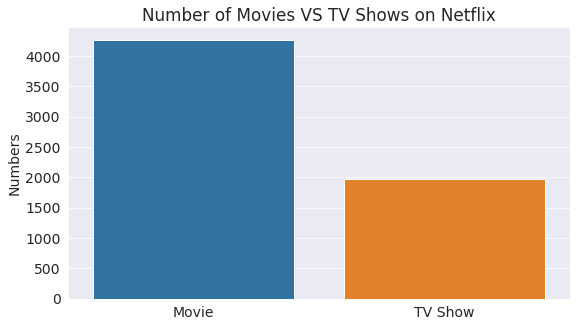

In [25]:
# Plotting of number ratio of netflix movies in comaprison of netflix tv shows

ax = sns.countplot(x='type', data=netflix_dc);

plt.xlabel('')
plt.ylabel('Numbers')
plt.title("Number of Movies VS TV Shows on Netflix");

In [26]:
movie_number = movie_dc.shape[0]
show_number = show_dc.shape[0]

print("There are {} movies in Netflix, or {:.2%} of the content.".format(movie_number, movie_number/(movie_number+show_number)))
print("There are {} TV shows in Netflix, or {:.2%} of the content.".format(show_number, show_number/(movie_number+show_number)))

There are 4265 movies in Netflix, or 68.42% of the content.
There are 1969 TV shows in Netflix, or 31.58% of the content.


In [27]:
# Length of netflix movies/shows

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


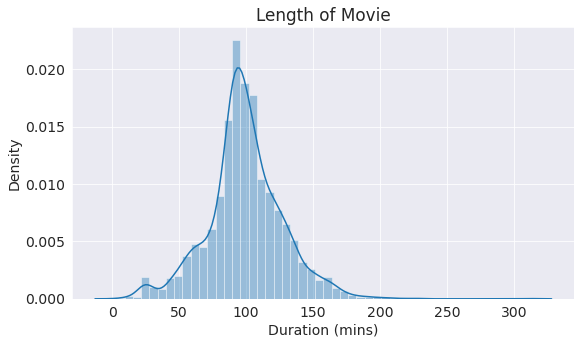

In [28]:
sns.distplot(a=movie_dc['duration'])

plt.xlabel("Duration (mins)")
plt.title("Length of Movie");

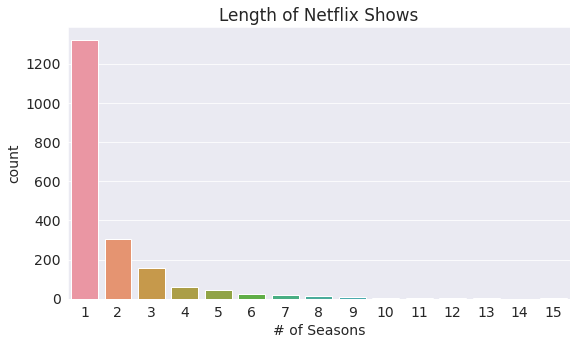

In [29]:
sns.countplot(data=show_dc, x='duration')

plt.title('Length of Netflix Shows')
plt.xlabel('# of Seasons');

In [30]:
# Rating of shows and movies

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating')

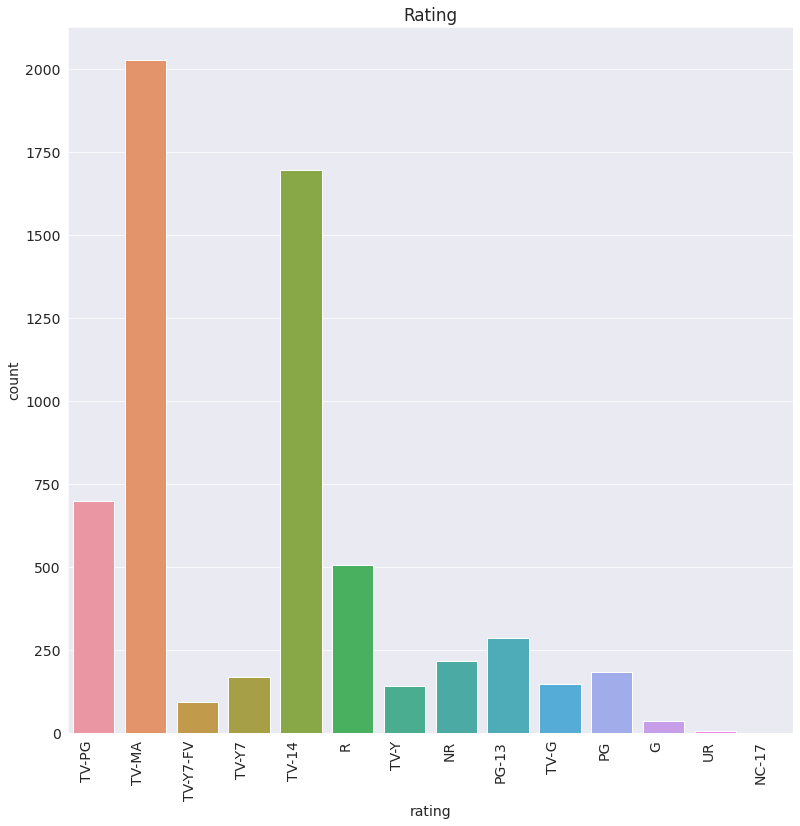

In [31]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

In [32]:
# Relation between Type and Rating

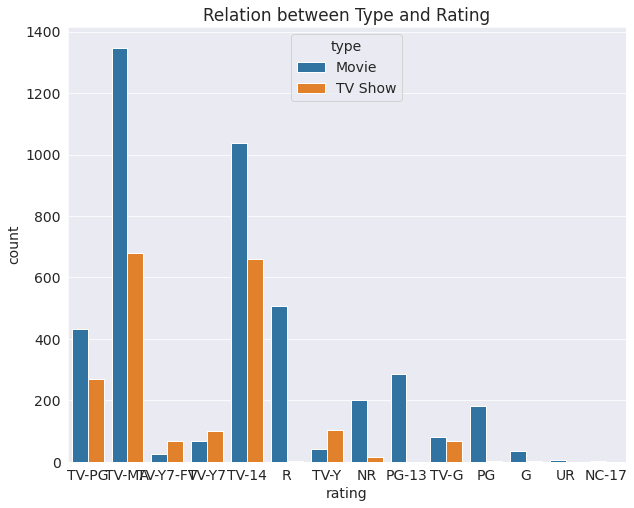

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/zerotopandas-course-final-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/kankit08/zerotopandas-course-final-project


'https://jovian.ai/kankit08/zerotopandas-course-final-project'

## Asking and Answering Questions

TODO - In this section, some interesting questions has been asked  and answered either by data or by plots



#### Q1: TODO -  To find most popular categories in top 3  countries

In [36]:
data = pd.read_csv('netflix-shows/netflix_titles.csv', delimiter=',', usecols=[1,5,10])

In [37]:

sorted = data.sort_values(['country', 'listed_in'],na_position='first')
sorted

,type,country,listed_in
3568,Movie,NaN,"Action & Adventure, Comedies"
4493,Movie,NaN,"Action & Adventure, Comedies, Dramas"
1397,Movie,NaN,"Action & Adventure, Comedies, Independent Movies"
3208,Movie,NaN,"Action & Adventure, Comedies, International Mo..."
4204,Movie,NaN,"Action & Adventure, Dramas, International Movies"
...,...,...,...
171,Movie,Vietnam,"Action & Adventure, Comedies, International Mo..."
117,Movie,Vietnam,"Action & Adventure, Dramas, International Movies"
437,Movie,Vietnam,"Comedies, Dramas, International Movies"
4826,Movie,Vietnam,"Horror Movies, International Movies, Thrillers"


In [38]:
ignore_nan = sorted.dropna(0)

In [39]:
countries = ignore_nan['country'].value_counts(normalize=True).round(4) * 100

In [40]:
threshold = 6.0

m = countries < threshold
#filter values under threshold
out = countries[~m]
#sum values under and create new values to Series
out['other'] = countries[m].sum()
out

United States     35.29
India             13.49
United Kingdom     6.04
other             45.99
Name: country, dtype: float64

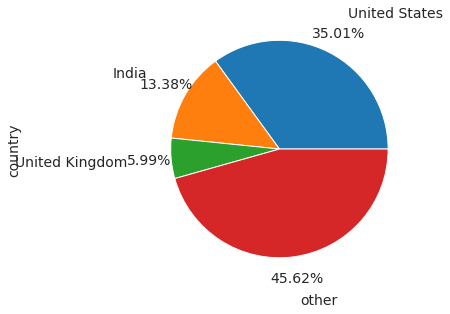

In [41]:
chart = out.plot(kind='pie', subplots=True, autopct = '%1.2f%%', pctdistance=1.2, labeldistance=1.4)
for ax in chart:
    ax.set_aspect('equal')
    ax.yaxis.set_label_coords(-0.45, 0.5)
plt.subplots_adjust(wspace=0.5)
plt.show(chart)

In [42]:
#finding the most popular category/genres on the top 3 countries

top_3_countries = ['United States', 'India', 'United Kingdom']
filtered_data = ignore_nan[ignore_nan['country'].isin(top_3_countries)]
filtered_data

,type,country,listed_in
4175,Movie,India,"Action & Adventure, Classic Movies, Comedies"
4232,Movie,India,"Action & Adventure, Classic Movies, Cult Movies"
4192,Movie,India,"Action & Adventure, Classic Movies, Dramas"
1809,Movie,India,"Action & Adventure, Comedies, Dramas"
2067,Movie,India,"Action & Adventure, Comedies, Dramas"
...,...,...,...
4530,Movie,United States,Thrillers
4854,Movie,United States,Thrillers
5069,Movie,United States,Thrillers
5077,Movie,United States,Thrillers


<AxesSubplot:ylabel='listed_in'>

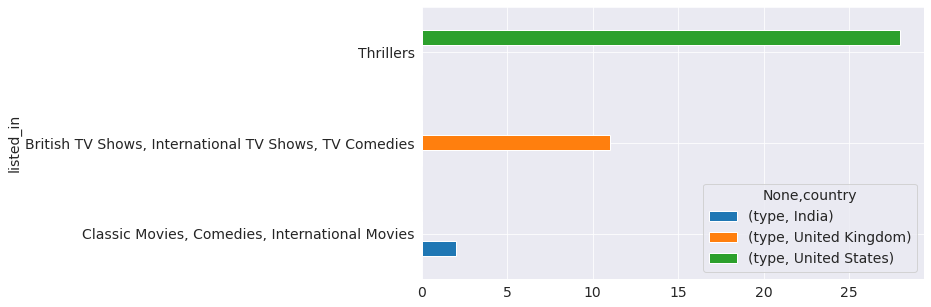

In [43]:
frequency = filtered_data.groupby(['country', 'listed_in']).count().sort_values('country').groupby(level=0).tail(1).unstack(0).plot.barh()
frequency

#### Q2: TODO - Check wether netflix focus on Movies 0r Shows

In [44]:
df2 = pd.read_csv('netflix-shows/netflix_titles.csv', delimiter=',', usecols=[1,6])
df3 = df2.dropna(0)
df3

,type,date_added
0,Movie,"September 9, 2019"
1,Movie,"September 9, 2016"
2,TV Show,"September 8, 2018"
3,TV Show,"September 8, 2018"
4,Movie,"September 8, 2017"
...,...,...
6218,TV Show,"April 10, 2019"
6219,TV Show,"April 1, 2019"
6220,TV Show,"April 1, 2016"
6221,TV Show,"April 1, 2016"


In [45]:
df3.loc[:,'year_added'] = pd.to_datetime(df3['date_added']).dt.year
df3

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,type,date_added,year_added
0,Movie,"September 9, 2019",2019
1,Movie,"September 9, 2016",2016
2,TV Show,"September 8, 2018",2018
3,TV Show,"September 8, 2018",2018
4,Movie,"September 8, 2017",2017
...,...,...,...
6218,TV Show,"April 10, 2019",2019
6219,TV Show,"April 1, 2019",2019
6220,TV Show,"April 1, 2016",2016
6221,TV Show,"April 1, 2016",2016


In [46]:
df4 = df3.drop('date_added', 1)
df4

,type,year_added
0,Movie,2019
1,Movie,2016
2,TV Show,2018
3,TV Show,2018
4,Movie,2017
...,...,...
6218,TV Show,2019
6219,TV Show,2019
6220,TV Show,2016
6221,TV Show,2016


<AxesSubplot:xlabel='year_added'>

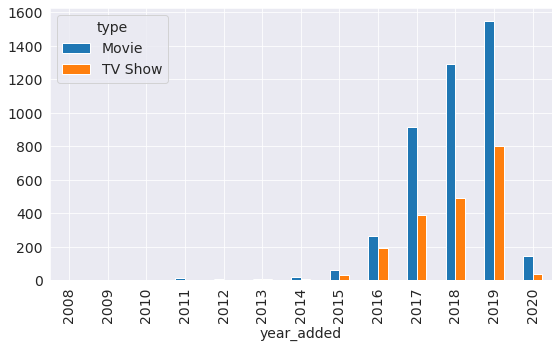

In [47]:
pd.crosstab(df4['year_added'], df4['type']).plot.bar()

#### Q3: TODO - Amount of content added per month

In [57]:
data_month_1=netflix['date_added'].reset_index()

In [58]:
#checking null values
data_month_1.isnull().any()

index         False
date_added     True
dtype: bool

In [59]:
#drop null values
data_month_1=data_month_1.dropna()
data_month_1.isnull().any()

index         False
date_added    False
dtype: bool

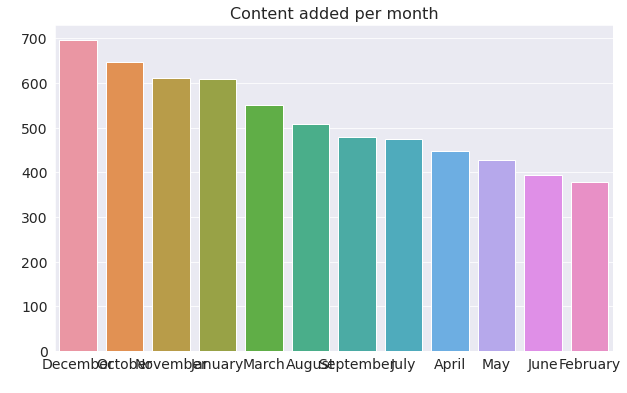

In [60]:
#deleating space before each month to split months and years later
data_month_1['date_added'].str.strip()
#spliting
y=data_month_1['date_added'].str.strip().str.split(' ',n=1,expand=True)

y=y.drop(columns=[1], axis=1)
count_month=y[0].value_counts().reset_index()
count_month=count_month.rename(columns={'index':'month',0:'counts'})

plt.figure(figsize=(10, 6))
sns.barplot(x= "month", y = 'counts', data=count_month)
plt.title("Content added per month", fontsize=16)
plt.ylabel(" ", fontsize=10)
plt.xlabel(" ", fontsize=10)
plt.show()

#### Q4: TODO - Analyze the top actors in Movies and Shows

<AxesSubplot:title={'center':'Top actors in movies'}>

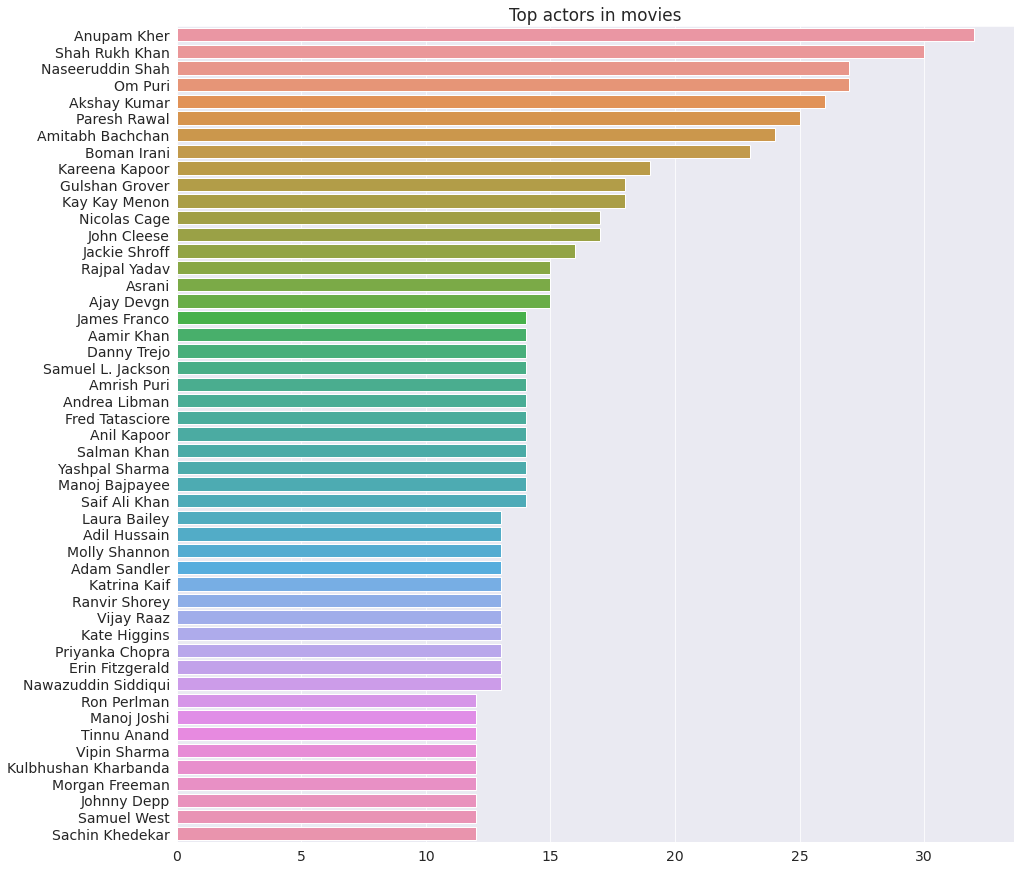

In [70]:
from collections import Counter

cat_actor=", ".join(netflix.loc[netflix['type']=='Movie']['cast'].fillna("")).split(", ")
count_list_actor=Counter(cat_actor).most_common(50)
count_list_actor=[_ for _ in count_list_actor if "" != _[0]]
labels_actor=[_[0] for _ in count_list_actor]
values_actor=[_[1] for _ in count_list_actor]
plt.figure(figsize=(15,15))
plt.title('Top actors in movies')
sns.barplot(x=values_actor,y=labels_actor)

<AxesSubplot:title={'center':'Top actors in Shows'}>

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


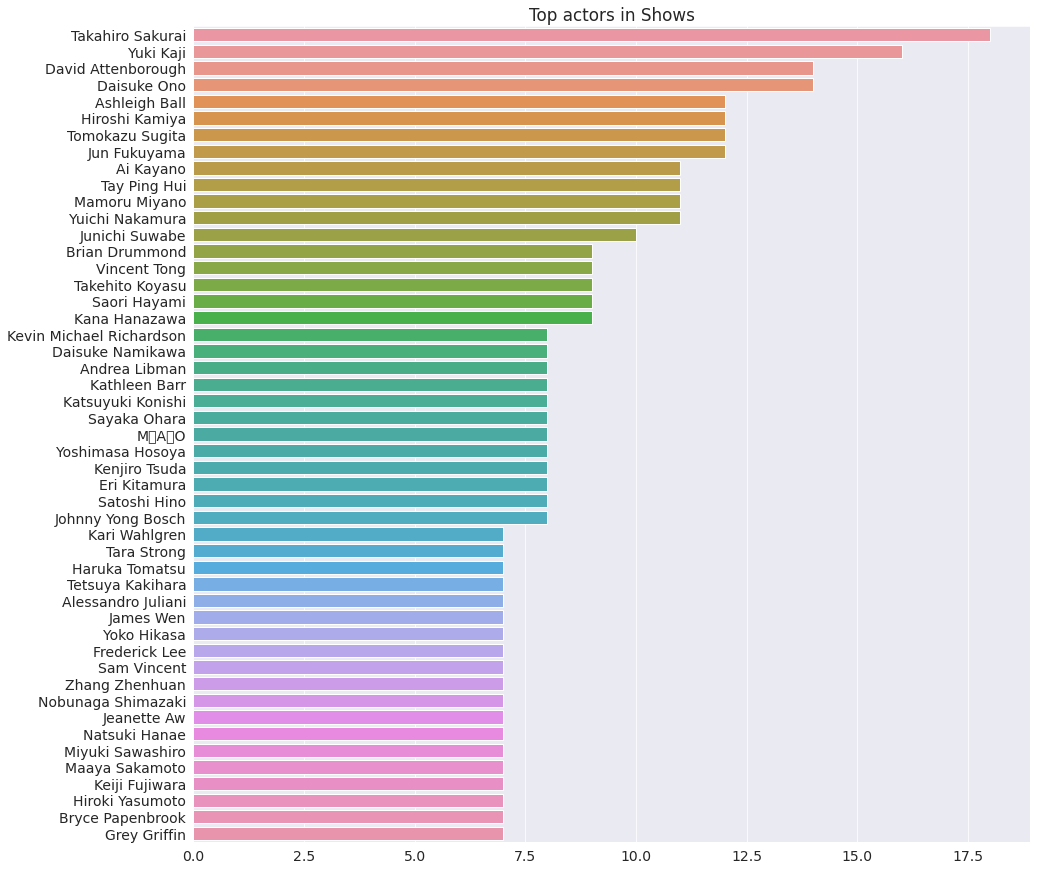

In [72]:
cat_actor_tv=", ".join(netflix.loc[netflix['type']=='TV Show']['cast'].fillna("")).split(", ")
count_list_actor_tv=Counter(cat_actor_tv).most_common(50)
count_list_actor_tv=[_ for _ in count_list_actor_tv if "" != _[0]]
labels_actor_tv=[_[0] for _ in count_list_actor_tv]
values_actor_tv=[_[1] for _ in count_list_actor_tv]
plt.figure(figsize=(15,15))
plt.title('Top actors in Shows')
sns.barplot(x=values_actor_tv,y=labels_actor_tv)

In [73]:
import jovian

In [75]:
jovian.commit(project="zerotopandas-course-final-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/zerotopandas-course-final-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/kankit08/zerotopandas-course-final-project


'https://jovian.ai/kankit08/zerotopandas-course-final-project'

## Inferences and Conclusion

Ratio of movies to shows are in the ratio of 2:1

Most of Netflix movies are around 100 minutes long

Movies have high rating compared to shows

Top 3 countries using Netflix are United States, united kingom, India

Shows content = Thrillerd, mostly seen in United states

Shows content = British Tv shows, International Tv Shows, Tv Comedies, mostly seen in United states

Shows content = classic movies, comedies, International Movies, mostly seen in India

December is the month where most of the contents added on netflix

In [76]:
import jovian

In [77]:
jovian.commit(project="zerotopandas-course-final-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/zerotopandas-course-final-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/kankit08/zerotopandas-course-final-project


'https://jovian.ai/kankit08/zerotopandas-course-final-project'

## References and Future Work

In the future, I will make a comparison of Netflix data with other OTT datasets

In [78]:
import jovian

In [ ]:
jovian.commit(project="zerotopandas-course-final-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
